In [227]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup
import plotly.plotly as py

In [228]:
os.chdir('E:\personal project\enova mockdown\Participant Files')

In [229]:
df=pd.read_csv('training.csv')

In [230]:
df.head()

,property_id,zone,sub_type,street_name,street_number,address_line_2,city_name,zip_code,days_on_market,build_date,...,basement,central_hvac,misc_features,exterior_color,exterior_material,initial_price,initial_value,purchase_decision,investment,final_price
0,1677886,residential,single family home,Thompson Prairie,45,NaN,Kellyfurt,91133,65,1971-11-22,...,1.0,0,NaN,grey,wood,128000.0,119400.0,1,41590,155000.0
1,5185610,residential,townhouse,Powell Gateway,13,NaN,New Gilbertside,66853,33,1977-12-01,...,0.0,1,NaN,grey,wood,184000.0,188500.0,1,34950,237000.0
2,8329034,residential,single family home,Elizabeth Mountain,68,NaN,South Robertville,99996,69,2012-09-19,...,1.0,1,NaN,white,brick,224000.0,218500.0,1,61050,278000.0
3,4831786,residential,townhouse,Bradley Well,51,NaN,Kellyland,25448,119,1904-09-23,...,0.0,0,patio,grey,brick,263000.0,277900.0,1,54320,361000.0
4,3621202,residential,single family home,Hendrix Run,275,NaN,South Suzannemouth,40464,110,1916-12-05,...,0.0,1,NaN,other,concrete_poured,265000.0,265700.0,1,44690,323000.0


In [231]:
df.dtypes[df.dtypes!='object']

property_id                     int64
street_number                   int64
address_line_2                float64
zip_code                        int64
days_on_market                  int64
current_population              int64
population_5_years_ago          int64
schools_in_area               float64
public_transit_score          float64
crime_score                   float64
culture_score                 float64
average_neighborhood_price    float64
overall_inspector_score       float64
sqft                          float64
floors_in_building            float64
floors_in_unit                float64
floor_of_unit                 float64
bedrooms                      float64
bathrooms                     float64
parking                         int64
basement                      float64
central_hvac                    int64
initial_price                 float64
initial_value                 float64
purchase_decision               int64
investment                      int64
final_price 

In [232]:
for i in ['street_number','zip_code','parking','central_hvac','basement']:
    df[i]=df[i].astype('object')

In [233]:
df.dtypes[df.dtypes=='object']

zone                        object
sub_type                    object
street_name                 object
street_number               object
city_name                   object
zip_code                    object
build_date                  object
remodel_date                object
area_type                   object
damage_code                 object
inspection_type             object
structural_quality_grade    object
exterior_condition_grade    object
interior_condition_grade    object
utilities_grade             object
damage_and_issue_grade      object
parking                     object
basement                    object
central_hvac                object
misc_features               object
exterior_color              object
exterior_material           object
dtype: object

address_line_2                1.00000
misc_features                 0.93660
damage_code                   0.86295
average_neighborhood_price    0.81610
floor_of_unit                 0.72465
bathrooms                     0.52785
bedrooms                      0.52785
remodel_date                  0.40505
crime_score                   0.10765
culture_score                 0.10625
floors_in_unit                0.05395
floors_in_building            0.05395
basement                      0.05395
public_transit_score          0.03840
schools_in_area               0.03840
sqft                          0.03790
overall_inspector_score       0.02510
dtype: float64


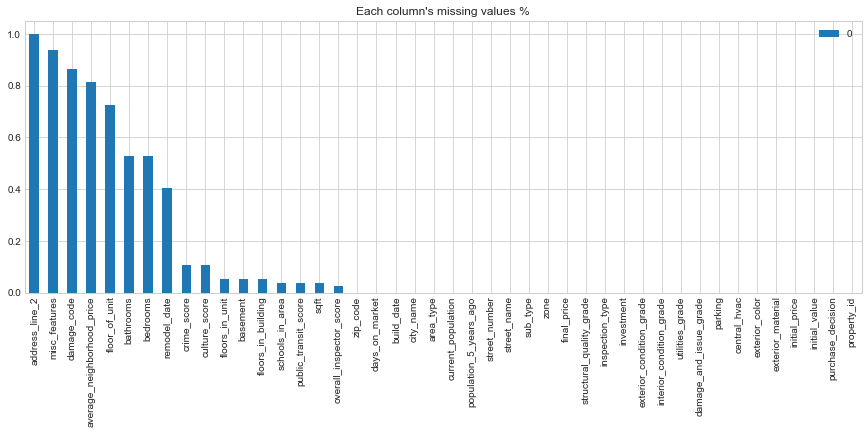

In [234]:
print((df.isnull().sum()[df.isnull().sum()/len(df)>0]/len(df)).sort_values(ascending =False))
pd.DataFrame((df.isnull().sum()/len(df)).sort_values(ascending =False)).plot(kind='bar',figsize=(15,5),title='Each column\'s missing values %')

In [235]:
# drop columns with missing values > 70%
df.drop(['address_line_2','misc_features','damage_code','average_neighborhood_price','floor_of_unit'],axis=1,inplace=True)

In [236]:
# drop useless columns
df.drop(['property_id','street_name','street_number','purchase_decision'],axis=1,inplace=True)

#### Categorical variables explorations

In [237]:
# number of classes for each category variable
for i in df.select_dtypes(include=['object']).columns.tolist():
    print(i,len(df[i].value_counts()))

zone 4
sub_type 11
city_name 1805
zip_code 1942
build_date 15338
remodel_date 7916
area_type 3
inspection_type 5
structural_quality_grade 6
exterior_condition_grade 6
interior_condition_grade 6
utilities_grade 6
damage_and_issue_grade 6
parking 2
basement 2
central_hvac 2
exterior_color 11
exterior_material 8


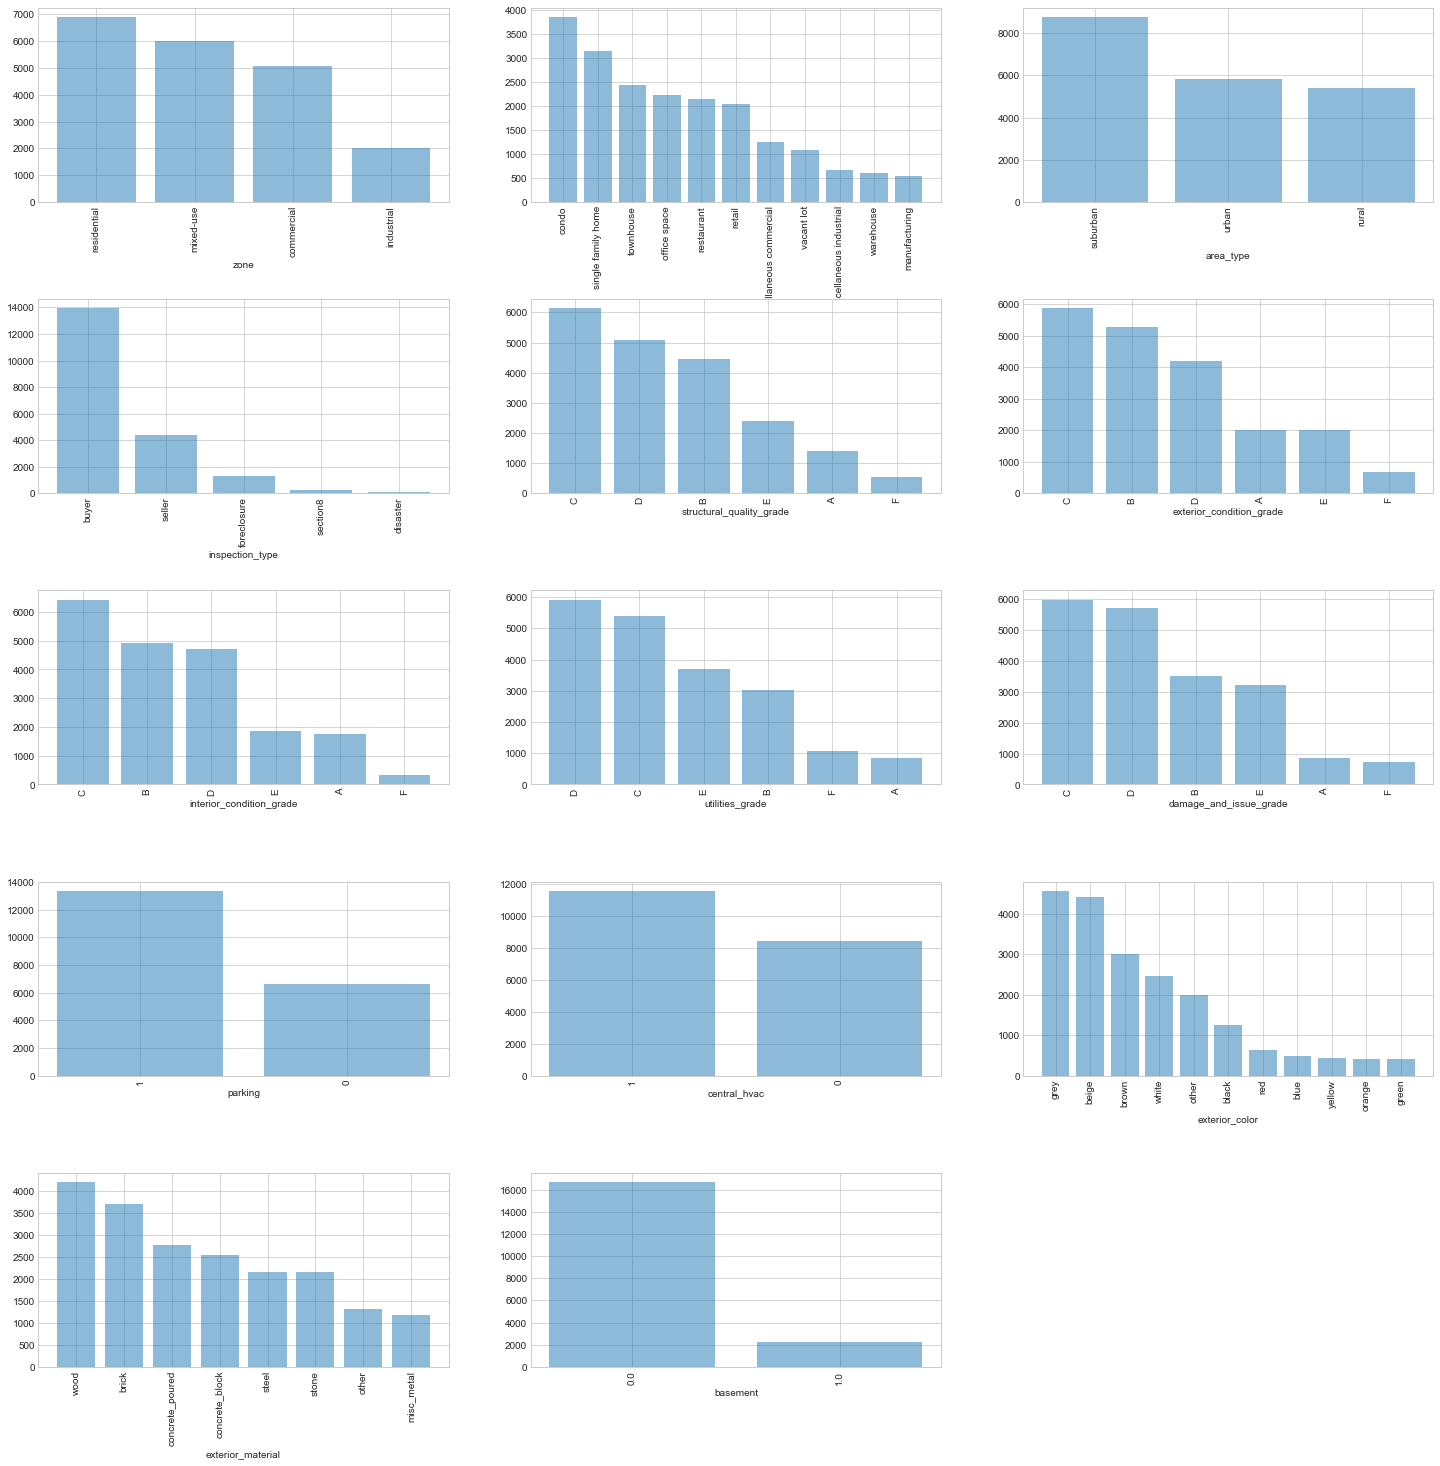

In [238]:
l_cat=['zone','sub_type','area_type','inspection_type','structural_quality_grade','exterior_condition_grade','interior_condition_grade',
      'utilities_grade','damage_and_issue_grade','parking','central_hvac','exterior_color','exterior_material','basement']

fig = plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace = 0.5)
for i in range(len(l_cat)):
    ax=fig.add_subplot(5, 3, i+1)
    obj=df[l_cat[i]].value_counts().index.tolist()
    ind=np.arange(len(obj))
    values=df[l_cat[i]].value_counts().values.tolist()
    ax.bar(ind,values,align='center', alpha=0.5)
    ax.set_xticks(ind)
    ax.set_xticklabels(obj)
    ax.set_xlabel(l_cat[i])
    plt.setp(ax.get_xticklabels(), rotation='vertical')

In [239]:
df['build_years']=2018-df.build_date.str[:4].apply(lambda x: int(x))
df['remodel_years']=2018-df.remodel_date.dropna().str[:4].apply(lambda x: int(x))
df.drop(['build_date','remodel_date'],axis=1,inplace=True)

In [240]:
df['ret']=((df.final_price-df.initial_price-df.investment)/(df.initial_price+df.investment))*100

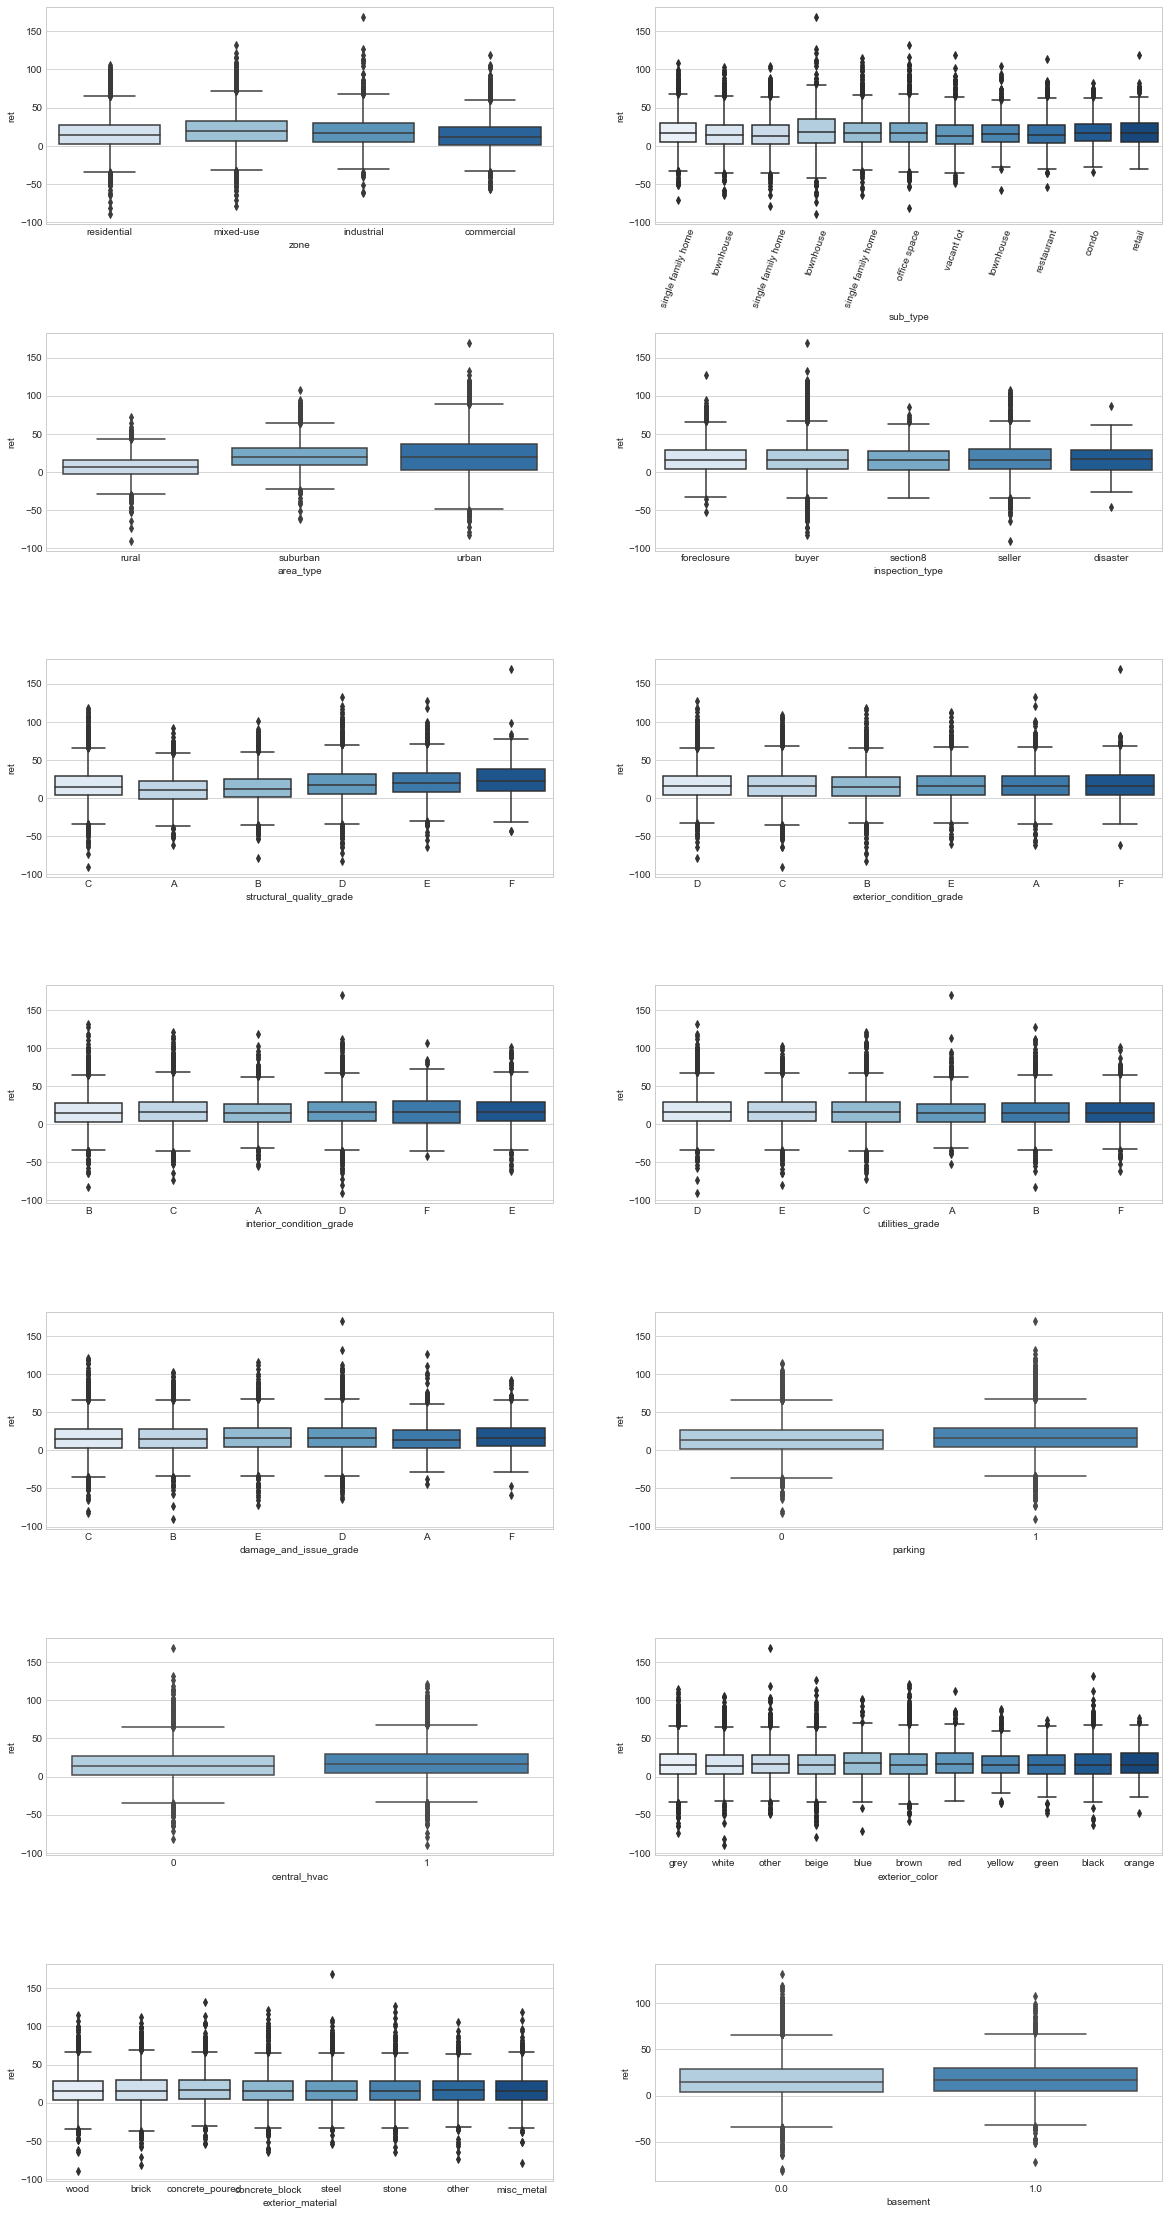

In [241]:
fig, axes  = plt.subplots(nrows=7, ncols=2,figsize=(20,40))
fig.subplots_adjust(hspace=.5)
k=0
for i in range(7):
    for j in range(2):
        sns.set_style("whitegrid")
        g=sns.boxplot(df[l_cat[k]],df['ret'],palette='Blues',ax=axes[i,j])
        if l_cat[k]=='sub_type':
            g.set_xticklabels(df[l_cat[k]],rotation=70)
        k+=1   

#### numerical variables exploration

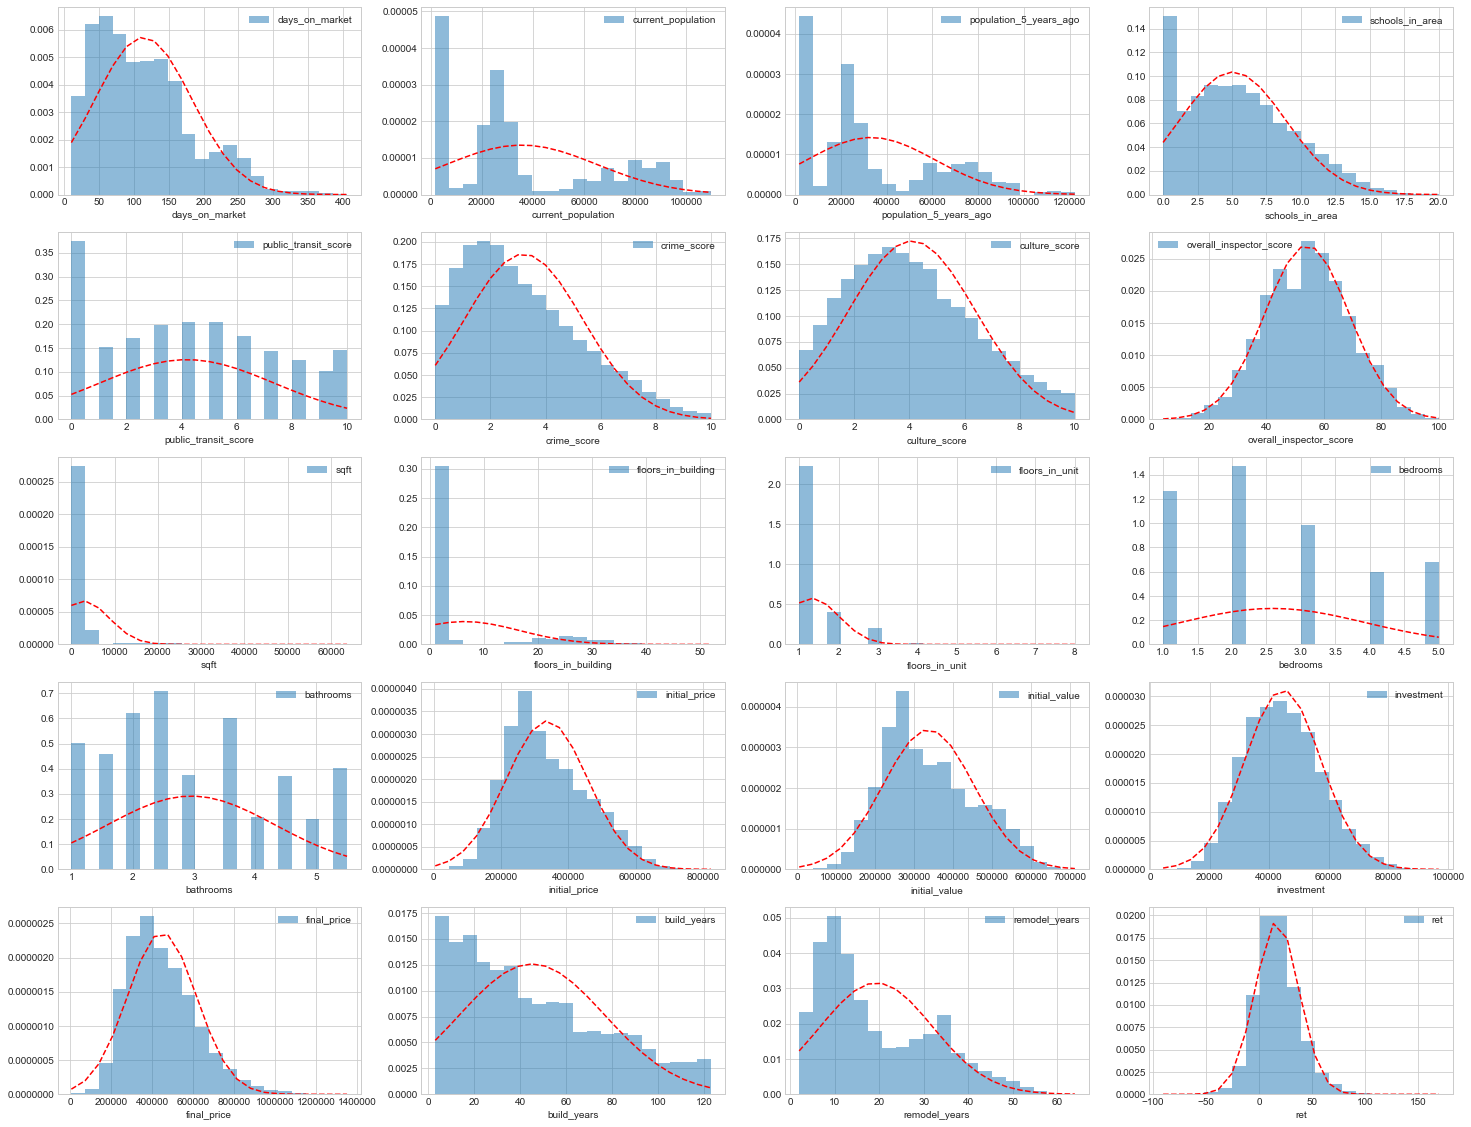

In [242]:
l_num=df.select_dtypes(exclude=['object']).columns
fig = plt.figure(figsize=(25,20))
for i in range(len(l_num)):
    ax=fig.add_subplot(5, 4, i+1)
    mu=df[l_num[i]].mean()
    sigma=df[l_num[i]].std()
    num_bins = 20
    n, bins, patches =ax.hist(df[l_num[i]].dropna(), num_bins, normed=1, alpha=0.5)
    # add a 'best fit' line
    y = matplotlib.mlab.normpdf(bins, mu, sigma)
    ax.plot(bins, y, 'r--')
    ax.set_xlabel(l_num[i])
    ax.legend()

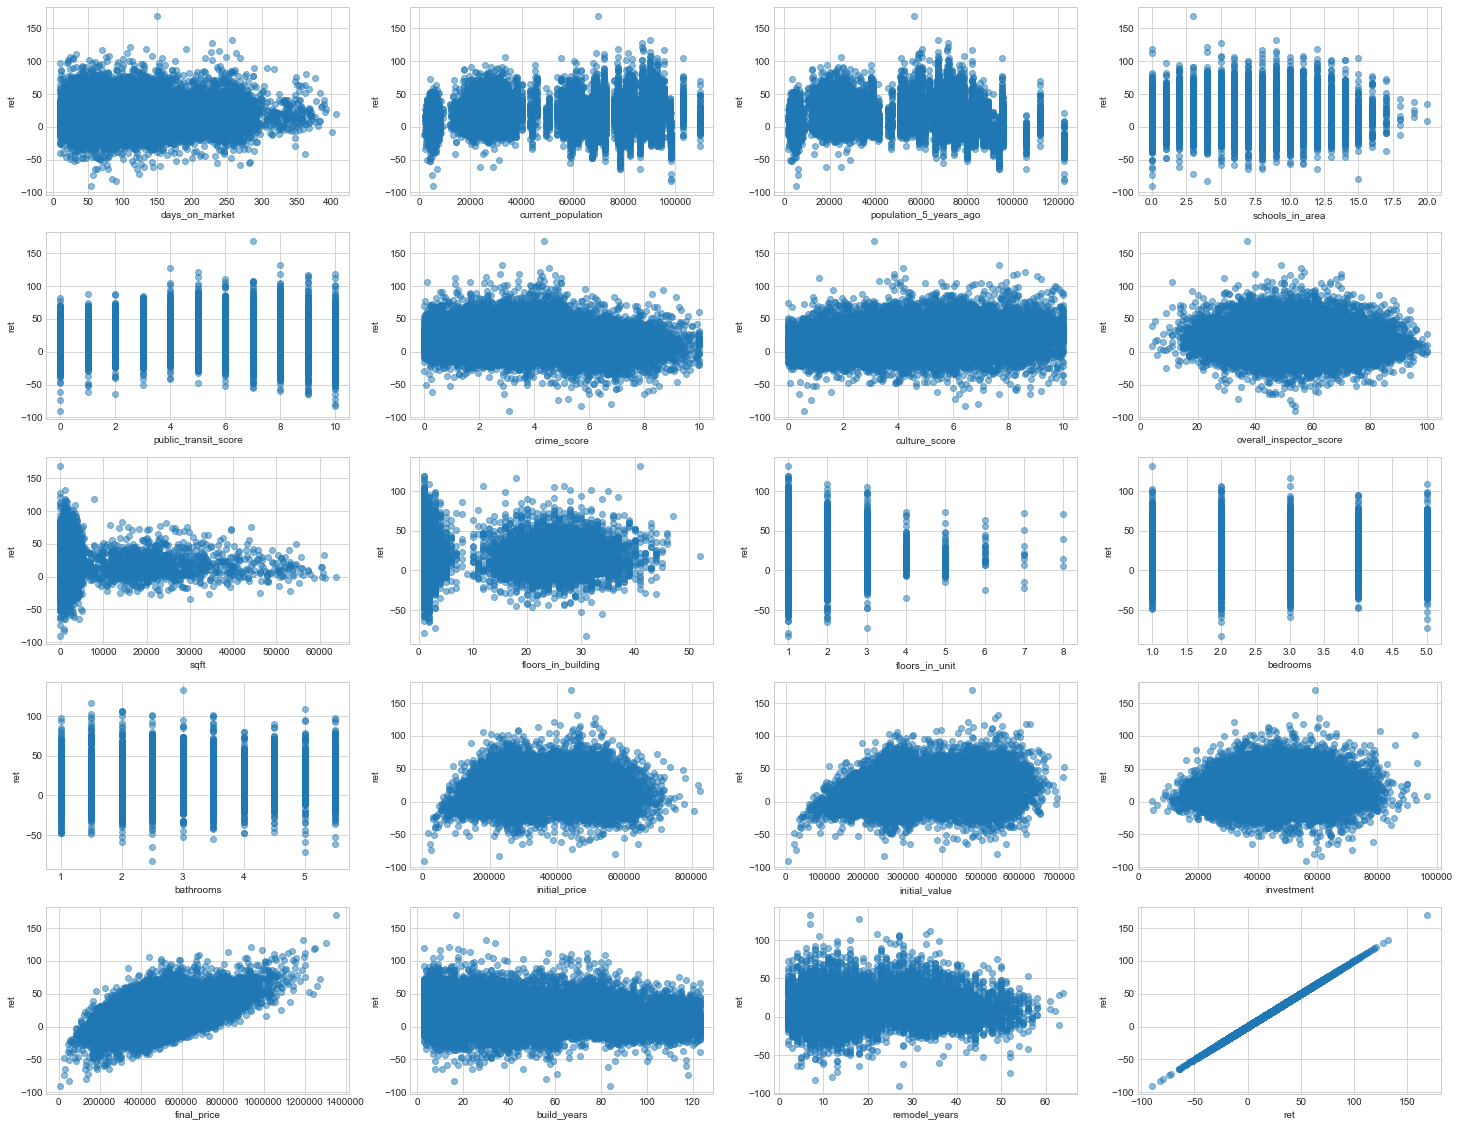

In [243]:
fig = plt.figure(figsize=(25,20))
for i in range(len(l_num)):
    ax=fig.add_subplot(5, 4, i+1)
    ax.scatter(df[l_num[i]],df['ret'],alpha=0.5)
    ax.set_xlabel(l_num[i])
    ax.set_ylabel('ret')

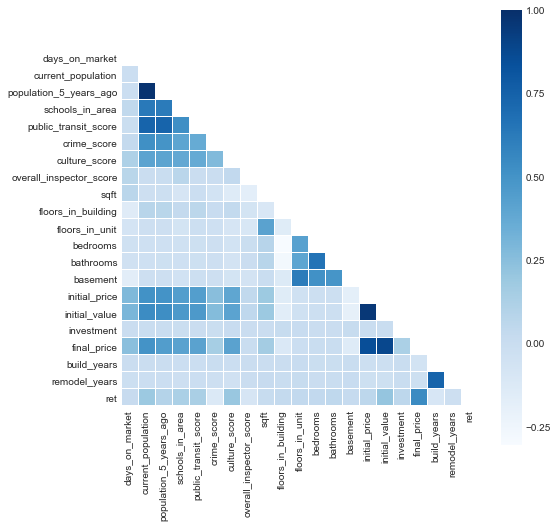

In [298]:
corr=df.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(8,8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,cmap=plt.cm.Blues,mask=mask,square=True,annot_kws={'size':8},linewidths=0.1)

#### independent variables with high correlation
* build_years--remodel_years
* curent_population--population_5_years_ago
* population--schools_in_area,public_transit_score,crime_score,culture_score
* floors_in_unit,bedromms,bathrooms,basement
##### ret seems not has strong correlation with independent variables 




#### use prefix to extract state information

In [244]:
r=requests.get('https://stevemorse.org/jcal/zipdetails.html')

In [245]:
soup=BeautifulSoup(r.content,'lxml')
tb=soup.find_all('script')[1]

In [246]:
zipcode_dict=dict()
for i in tb.contents[0].split('\n'):
    if re.search(r'\[\s*\S*\s"\w',i)!=None:
        res=re.search(r'(\[\s*)(\d*)(,\s")([\S*\s]+)(")',i).group(2,4)
        zipcode_dict[res[0]]=res[1][-2:]

In [247]:
zipcode_dict['5']

'NY'

In [248]:
df['pre_zip']=df.zip_code.apply(lambda x: str(x)[:-2])
df['State']=df.pre_zip.apply(lambda x: zipcode_dict[x] if x in zipcode_dict.keys() else np.nan)

In [249]:
df_st=df.groupby(by='State').agg({'ret': ['mean','count'], 'initial_price': 'mean',
                                     'final_price': 'median','investment': 'mean'})

df_st['state']=df_st.index
df_st.columns=['ret_mean','count','init_p_mean','final_p_med','inv_mean','state']
df_st=df_st.round(2)

In [250]:
for col in df_st.columns:
    df_st[col] = df_st[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_st['text'] = df_st['state'] + '<br>' +\
    ' Initial price mean: '+df_st['init_p_mean']+'<br>'+\
    ' Final price median: '+df_st['final_p_med']+'<br>'+\
    ' Investment mean: '+df_st['inv_mean']+'<br>'+\
    ' Count: '+df_st['count']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_st['state'],
        z = df_st['ret_mean'].astype(float),
        locationmode = 'USA-states',
        text = df_st['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Return %")
        ) ]

layout = dict(
        title = 'Average Return by States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

#### Fill in Missing Values

In [251]:
# according to the variables' distribution, fill in missing value with mean/median/mode
for i in ['schools_in_area','public_transit_score','crime_score','culture_score',
          'overall_inspector_score','bedrooms','bathrooms']:
    df[i].fillna(df[i].mean(),inplace=True)

for i in ['sqft','floors_in_building','floors_in_unit','remodel_years']:
    df[i].fillna(df[i].median(),inplace=True)
    
df['basement'].fillna(df['basement'].mode()[0],inplace=True)
df['State'].fillna('NA',inplace=True)

### Tree Based Model
* Random Forest
* XGboost

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [253]:
df1=df.drop(['city_name', 'zip_code','initial_price','initial_value', 'investment', 
             'final_price','pre_zip'],axis=1)

In [254]:
df1_dum=pd.get_dummies(df1,drop_first=True)

df1_X=df1_dum.drop('ret',axis=1)
df1_Y=df1_dum['ret']

x_trn,x_tes,y_trn,y_tes=train_test_split(df1_X,df1_Y,test_size=0.2, random_state=33)

In [258]:
print(x_trn.shape,x_tes.shape)
print(y_trn.shape,y_tes.shape)

(16000, 127) (4000, 127)
(16000,) (4000,)


#### Select important features

In [279]:
extree = ExtraTreesRegressor(n_estimators=10,random_state=33)
extree.fit(x_trn,y_trn)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=33, verbose=0, warm_start=False)

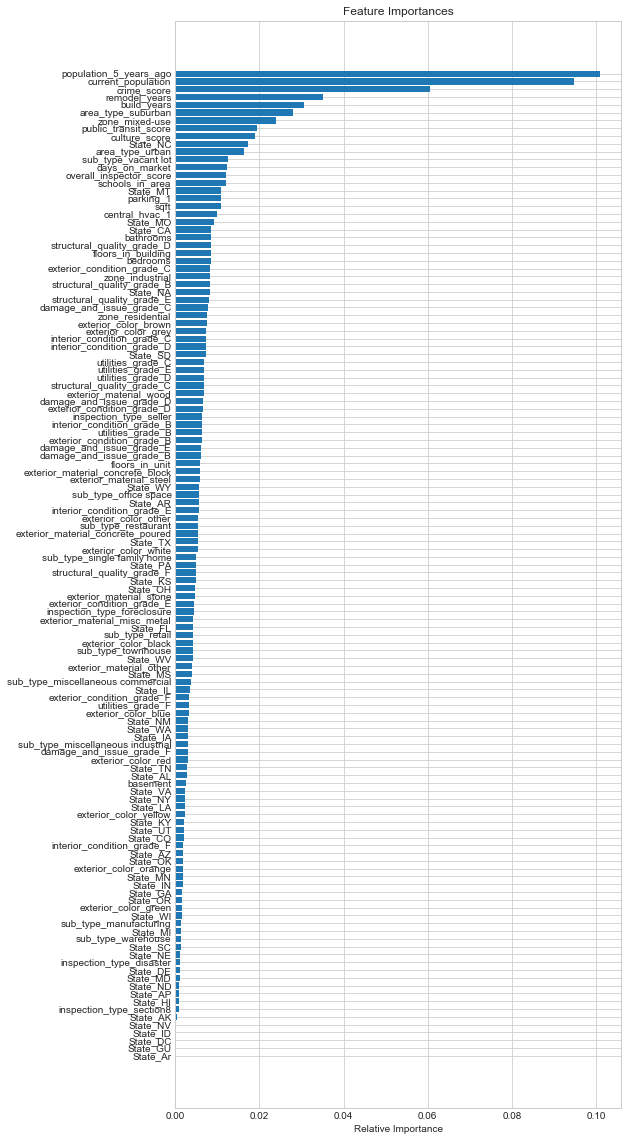

In [280]:
importances = extree.feature_importances_
features = df1_X.columns.values
indices = np.argsort(importances)
# Plot featrue importances
fig = plt.subplots(figsize=(8,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [325]:
feats_extree=features[indices][::-1][:11]

In [326]:
x_trn_s=x_trn[feats_extree]
x_tes_s=x_tes[feats_extree]

In [327]:
x_trn_s.columns

Index(['population_5_years_ago', 'current_population', 'crime_score',
       'remodel_years', 'build_years', 'area_type_suburban', 'zone_mixed-use',
       'public_transit_score', 'culture_score', 'State_NC', 'area_type_urban'],
      dtype='object')

#### Random Forest_baseline model

In [328]:
rf = RandomForestRegressor()
rf.fit(x_trn_s, y_trn)
rf_pred_trn = rf.predict(x_trn_s)
rf_pred_tes = rf.predict(x_tes_s)
print("Training set mean square error:", mean_squared_error(y_trn, rf_pred_trn))
print("Test set mean square error:", mean_squared_error(y_tes, rf_pred_tes))

Training set mean square error: 45.311614773841214
Test set mean square error: 234.41285812382608


#### XGBoost_baseline model

In [329]:
xgboost = XGBRegressor()
xgboost.fit(x_trn_s, y_trn)
xgb_pred_trn = xgboost.predict(x_trn_s)
xgb_pred_tes = xgboost.predict(x_tes_s)
print("Training set mean square error:", mean_squared_error(y_trn, xgb_pred_trn))
print("Test set mean square error:", mean_squared_error(y_tes, xgb_pred_tes))

Training set mean square error: 214.18146890014592
Test set mean square error: 209.62855481154094


#### Linear Regression

In [302]:
# backward selection 
rg = LinearRegression.(normalize=True)
selector = RFE(rg, step=1)
selector = selector.fit(x_trn, y_trn)

In [307]:
feats_rg=x_trn.columns[selector.ranking_==1]
feats_rg

Index(['crime_score', 'culture_score', 'bathrooms', 'zone_industrial',
       'zone_mixed-use', 'sub_type_manufacturing',
       'sub_type_miscellaneous commercial',
       'sub_type_miscellaneous industrial', 'sub_type_office space',
       'sub_type_retail', 'sub_type_warehouse', 'area_type_suburban',
       'area_type_urban', 'inspection_type_disaster',
       'structural_quality_grade_B', 'structural_quality_grade_C',
       'structural_quality_grade_D', 'structural_quality_grade_E',
       'structural_quality_grade_F', 'parking_1', 'central_hvac_1',
       'exterior_color_red', 'exterior_material_misc_metal', 'State_AK',
       'State_AL', 'State_AP', 'State_AR', 'State_AZ', 'State_Ar', 'State_CA',
       'State_CO', 'State_FL', 'State_HI', 'State_IA', 'State_ID', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MD', 'State_MI', 'State_MS',
       'State_MT', 'State_NA', 'State_NC', 'State_ND', 'State_NE', 'State_NM',
       'State_NV', 'State_NY', 'State_OK', 'State_

In [308]:
x_trn_ss=x_trn[feats_rg]
x_tes_ss=x_tes[feats_rg]

In [309]:
lrg = LinearRegression(normalize=True)
lrg.fit(x_trn_ss,y_trn)
lrg_pred_trn=lrg.predict(x_trn_ss)
lrg_pred_tes=lrg.predict(x_tes_ss)
print("Training set mean square error:", mean_squared_error(y_trn, lrg_pred_trn))
print("Test set mean square error:", mean_squared_error(y_tes, lrg_pred_tes))

Training set mean square error: 340.8880997704048
Test set mean square error: 322.2769570247274


### Online zipcode sources

But I could only find 10,000+ zipcode in those resources

In [61]:
os.chdir('E:\personal project\enova mockdown\zip_code')

In [189]:
z1=pd.read_csv('us_postal_codes.csv')
z2=pd.read_csv('zip_codes_states.csv')
z3=pd.read_csv('ZIP-COUNTY-FIPS_2017-06.csv')
z4=pd.read_csv('free-zipcode-database-Primary.csv')

In [190]:
name=['zip_code','city','county','state','lat','long','fp']

In [191]:
z1['fp']=np.nan
z1=z1[['Zip Code','Place Name','County','State','Latitude','Longitude','fp']]
z1.columns=name

In [192]:
z2['fp']=np.nan
z2=z2[['zip_code','city','county','state','latitude','longitude','fp']]
z2.columns=name

In [193]:
extra=z2[z2.zip_code.isin(list(set(z2.zip_code).difference(z1.zip_code)))]
z_total=pd.concat([z1,extra],axis=0)

In [194]:
z3['city']=np.nan
z3['lat']=np.nan
z3['long']=np.nan
z3=z3[['ZIP','city','COUNTYNAME','STATE','lat','long','STCOUNTYFP']]
z3.columns=name

In [195]:
extra=z3[z3.zip_code.isin(list(set(z3.zip_code).difference(z_total.zip_code)))]
z_total=pd.concat([z_total,extra],axis=0)

In [196]:
len(z_total)

43182

In [197]:
z4['fp']=np.nan
z4['county']=np.nan
z4=z4[['Zipcode','City','county','State','Lat','Long','fp']]
z4.columns=name

In [198]:
extra=z4[z4.zip_code.isin(list(set(z4.zip_code).difference(z_total.zip_code)))]
z_total=pd.concat([z_total,extra],axis=0)

In [199]:
len(z_total)

43440

In [201]:
z_total.reset_index(drop=True,inplace=True)

In [202]:
z_total

,zip_code,city,county,state,lat,long,fp
0,501,Holtsville,Suffolk,New York,40.8154,-73.0451,NaN
1,544,Holtsville,Suffolk,New York,40.8154,-73.0451,NaN
2,1001,Agawam,Hampden,Massachusetts,42.0702,-72.6227,NaN
3,1002,Amherst,Hampshire,Massachusetts,42.3671,-72.4646,NaN
4,1003,Amherst,Hampshire,Massachusetts,42.3919,-72.5248,NaN
5,1004,Amherst,Hampshire,Massachusetts,42.3845,-72.5132,NaN
6,1005,Barre,Worcester,Massachusetts,42.4097,-72.1084,NaN
7,1007,Belchertown,Hampshire,Massachusetts,42.2751,-72.4110,NaN
8,1008,Blandford,Hampden,Massachusetts,42.1829,-72.9361,NaN
9,1009,Bondsville,Hampden,Massachusetts,42.2061,-72.3405,NaN


In [203]:
z_total.to_csv('zip_code_dict.csv',index=False)

#### use python zipcode package 

https://pypi.org/project/zipcode/

https://pythonhosted.org/uszipcode/

But it is still very limited, can only extend 581 unknown zipcodes

In [229]:
from uszipcode import ZipcodeSearchEngine

In [231]:
search = ZipcodeSearchEngine()

In [260]:
z_rest=set(df.zip_code).difference(set(z_total))
res=[]
for i in z_rest:
    if search.by_zipcode(str(i)).Zipcode!=None:
        res.append(i)

In [257]:
len(res)

581